<a href="https://colab.research.google.com/github/mrinal054/my_utils/blob/main/demo/runtime_patch/runtime_patch_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirements:
    
`pip install jenti`

## Brief description of `runtime_patch.py` file

This code is to generate on-the-fly patches for PyTorch or TensorFlow DataLoaders.

```python
# Overview
def runtime_patch(
        image, # an nd-array with size H x W or H x W x Ch
        mask, # an nd-array with size H x W or H x W x Ch
        patch_shape:tuple=(256,256), # patch size
        overlap:tuple=(0,0), # overlap between adjacent patches
        FG_PROB:float=0.9, # probability of choosing a foreground
        MAX_ROI:bool=True, # if true and the returned patch is a foreground patch, then it
                           # returns the patch that has maximum info or region of interest (roi) 
        ):
    
    """
    This function returns an image patch and the corresponding mask patch. The patch
    can be a background patch or a foreground patch.
    
        foreground patch: It contains information or region of interest (roi)
        background patch: It does not contain any info or roi
        
    Return
    --------
    It returns an image patch and the corresponding mask patch. 
    Size of image/mask patch: (patch_H, patch_W, ch) or (patch_H, patch_W)
    """
```

## Demo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install jenti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/GitHub/demo')

Original image shape: (512, 512, 3)
Patch image shape: (256, 256, 3)


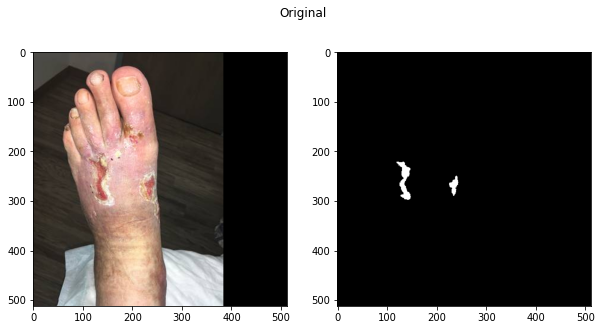

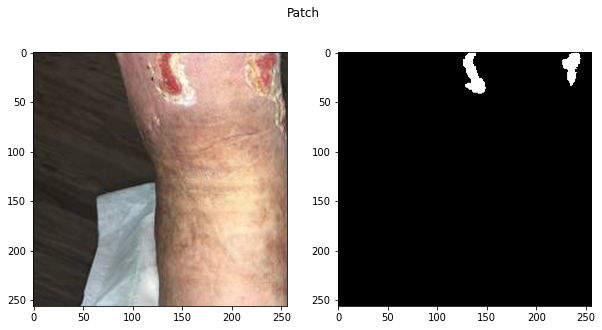

In [11]:
from runtime_patch import runtime_patch        
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import os

# Parameters
FG_PROB = 0.9 # probability of selecting a foreground image
MAX_ROI = True # select the patch that has maximum roi 

# Directory
img_dir = '/content/drive/MyDrive/Colab Notebooks/GitHub/demo/dataset/images'
mask_dir = '/content/drive/MyDrive/Colab Notebooks/GitHub/demo/dataset/labels'

# List of images
names = os.listdir(img_dir)

# Randomly choose a name
name = random.choice(names)

# Read image
image = cv2.imread(os.path.join(img_dir, name))[:,:,::-1]
mask = cv2.imread(os.path.join(mask_dir, name), 0)

mask = np.expand_dims(mask, axis=-1) # add channel axis

# Create patches
patch_image, patch_mask = runtime_patch(
        image, 
        mask, 
        patch_shape=(256,256), 
        overlap=(0,0), 
        FG_PROB=0.9, 
        MAX_ROI=True)  

print('Original image shape:', image.shape)
print('Patch image shape:', patch_image.shape)

# Visualize patches
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Original')
ax[0].imshow(image)
ax[1].imshow(np.squeeze(mask), cmap='gray')

fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Patch')
ax[0].imshow(patch_image)
ax[1].imshow(np.squeeze(patch_mask), cmap='gray')

#### Image credit

https://github.com/uwm-bigdata/wound-segmentation 